# Génération d'une structure GeOH minimisé avec sa couche d'eau interne liée

## Génération du fichier xyz

In [1]:
from imogolite.simulation.structure import minimizStructNTI

In [2]:
Y, X = 'OH', 'Ge'
n1, n2, Ri, Re, T = 22, 0, 14.3, 18.8, 8.64
m = minimizStructNTI.Config_nanotube(n1 = n1, n2 = n2, X=X, Y=Y, Ri = Ri, Re = Re, T = T)

In [3]:
res= m.minimizeStructure(Ri = Ri, Re=Re)

Additional constraints:  Ri=14.30 Re=18.80
Configuration minimisée en 0.20 s
Energie atteinte = 0.0598 mdyn A


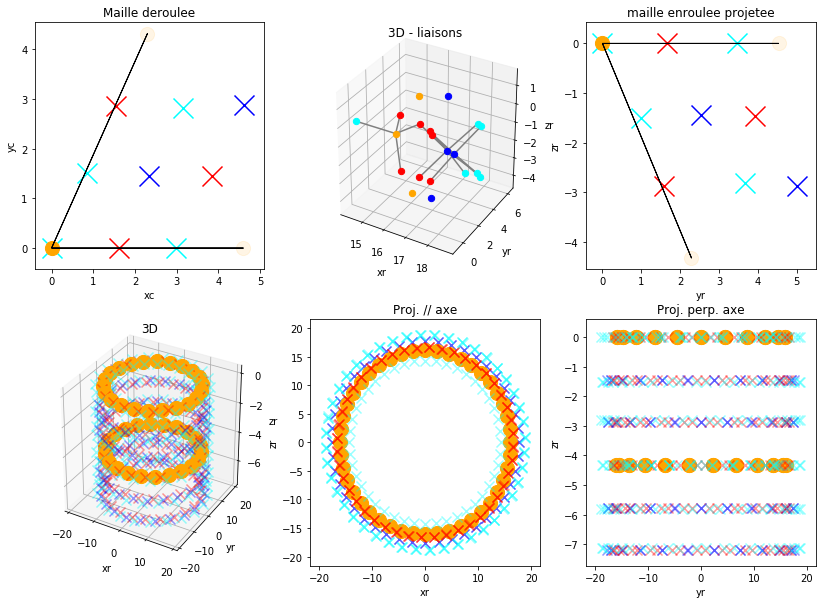

In [4]:
m.plot()

In [5]:
m.save_nxyz(outputFileName='GeOH_22_0_14.30_18.80-L=8.64.xyz')
m.save_nxyz(outputFileName='GeOH_22_0_14.30_18.80-L=8.64_H2O.xyz', addBondedH2O=True)

GeOH_22_0_14.30_18.80-L=8.64_4.xyz file saved in . !
GeOH_22_0_14.30_18.80-L=8.64_5.xyz file saved in . !


'GeOH_22_0_14.30_18.80-L=8.64_H2O.xyz'

## Simulation du diffractogramme X

In [6]:
import imogolite.simulation.xrd.debye_gpu.Debye_GPU as debye

### Nanotube sec

In [7]:
Q, I_dry_20 = debye.from_nxyzfile('GeOH_22_0_14.30_18.80-L=8.64.xyz', qmin=0.1, qmax=8.0, T=T, N=20, target='GPU')
Q, I_dry = debye.from_nxyzfile('GeOH_22_0_14.30_18.80-L=8.64.xyz', qmin=0.1, qmax=8.0, T=T, N=int(450/8.64), target='GPU')

Loading : 1

### Nanotube hydraté

In [8]:
Q, I_pHyd_20 = debye.from_nxyzfile('GeOH_22_0_14.30_18.80-L=8.64_H2O.xyz', qmin=0.1, qmax=8.0, T=T, N=20, target='GPU')
Q, I_pHyd = debye.from_nxyzfile('GeOH_22_0_14.30_18.80-L=8.64_H2O.xyz', qmin=0.1, qmax=8.0, T=T, N=int(450/8.64), target='GPU')

Loading : 1

In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'DRX GeOH avec N=52')

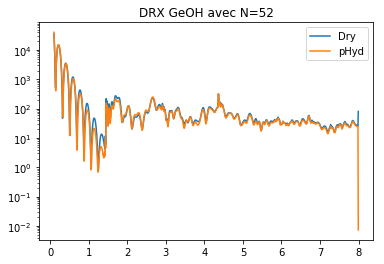

In [10]:
plt.semilogy(Q, I_dry, label='Dry')
plt.semilogy(Q, I_pHyd, label='pHyd')
plt.legend()
plt.title(f'DRX GeOH avec N={int(450/8.64)}')

## Convolution avec la résolution de Cataxlism

In [11]:
from imogolite.utils import convolveResolution

In [12]:
I_dry_res = convolveResolution.convolve_resolution(Q, I_dry, sig = 0.01)
I_pHyd_res = convolveResolution.convolve_resolution(Q, I_pHyd, sig = 0.01)

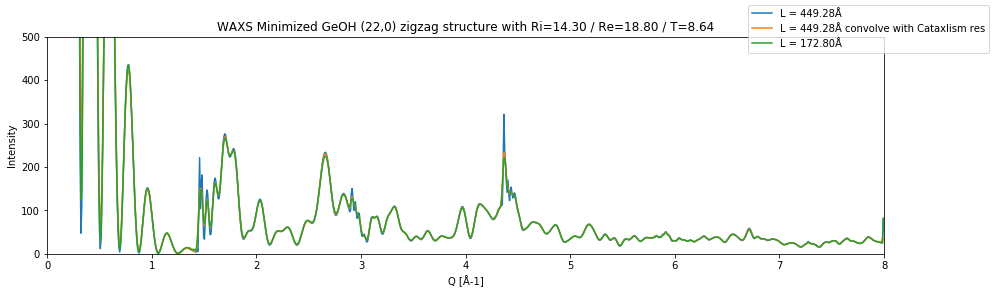

In [14]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(Q, I_dry, label=f'L = {T*int(450/8.64):.2f}Å')
ax.plot(Q, I_dry_res, label=f'L = {T*int(450/8.64):.2f}Å convolve with Cataxlism res')
ax.plot(Q, I_dry_20, label=f'L = {T*20:.2f}Å')

ax.set_title('WAXS '+m.getInfo())

ax.set_ylabel('Intensity')
ax.set_ylim(0,500)

ax.set_xlabel('Q [Å-1]')
ax.set_xlim(0,8)
fig.legend(loc='upper right')

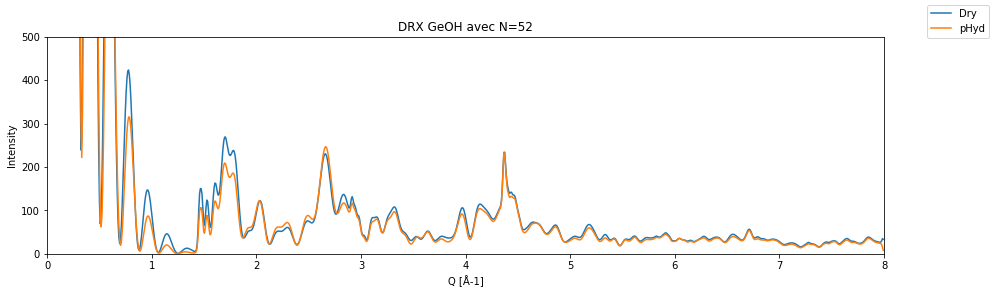

In [15]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(Q, I_dry_res, label='Dry')
ax.plot(Q, I_pHyd_res, label='pHyd')
ax.set_title(f'DRX GeOH avec N={int(450/8.64)}')

ax.set_ylabel('Intensity')
ax.set_ylim(0,500)

ax.set_xlabel('Q [Å-1]')
ax.set_xlim(0,8)
fig.legend(loc='upper right')